## PI Challenge

The following code  solves the approximation pi challenge, it's code in c++
```c++
#include <iostream>
#include <random>
#include <cmath>
#include <omp.h>

using namespace std;

int main(int argc, char ** argvs) {
  random_device rd;
  mt19937 gen(rd());
  uniform_real_distribution<double> real_dist(0.0, 1.0);
  if (argc != 2) {
    cout << "Use: executable #of_experiments" << endl;
    return 0;
  }

  int tries = atoi(argvs[1]), success = 0;
  int i = 0;
  double start_t = omp_get_wtime();
  #pragma omp parallel for private(i) schedule(dynamic) reduction(+: success)
  for ( i = 0; i < tries; i++ ) {
    double x = real_dist(gen);
    double y = real_dist(gen);
    success += x * x + y * y < 1.0 ? 1 : 0;
  }
  double end_t = omp_get_wtime();
  cout << "{\n" << "\"data\": " << tries << ",\n";
  cout << "\"time\": " << end_t - start_t << ",\n";
  cout << "\"approximation\" :" << (4.0 * success) / tries << "\n},\n";

  return 0;
}
```

In [1]:
omp = [
{
"data": 1000000,
"time": 0.155364,
"approximation" :3.13824
},
{
"data": 2000000,
"time": 0.297801,
"approximation" :3.14287
},
{
"data": 3000000,
"time": 0.463245,
"approximation" :3.14243
},
{
"data": 4000000,
"time": 0.609571,
"approximation" :3.14068
},
{
"data": 5000000,
"time": 0.755204,
"approximation" :3.14369
},
{
"data": 6000000,
"time": 0.918256,
"approximation" :3.14024
},
{
"data": 7000000,
"time": 1.07069,
"approximation" :3.14136
},
{
"data": 8000000,
"time": 1.22666,
"approximation" :3.14076
},
{
"data": 9000000,
"time": 1.38776,
"approximation" :3.14099
},
{
"data": 10000000,
"time": 1.52483,
"approximation" :3.14197
},
{
"data": 11000000,
"time": 1.68586,
"approximation" :3.14127
},
{
"data": 12000000,
"time": 1.82796,
"approximation" :3.14135
},
{
"data": 13000000,
"time": 1.97438,
"approximation" :3.14146
},
{
"data": 14000000,
"time": 2.1662,
"approximation" :3.13987
},
{
"data": 15000000,
"time": 2.28364,
"approximation" :3.14104
},
{
"data": 16000000,
"time": 2.46319,
"approximation" :3.14055
},
{
"data": 17000000,
"time": 2.57592,
"approximation" :3.14224
},
{
"data": 18000000,
"time": 2.74988,
"approximation" :3.14092
},
{
"data": 19000000,
"time": 2.8616,
"approximation" :3.14065
},
{
"data": 20000000,
"time": 3.03484,
"approximation" :3.14153
},
]


In [2]:
seq = [
{
"data": 1000000,
"time": 0.222782,
"approximation" :3.13868
},
{
"data": 2000000,
"time": 0.450488,
"approximation" :3.14256
},
{
"data": 3000000,
"time": 0.680499,
"approximation" :3.14286
},
{
"data": 4000000,
"time": 0.890723,
"approximation" :3.14228
},
{
"data": 5000000,
"time": 1.11514,
"approximation" :3.1429
},
{
"data": 6000000,
"time": 1.3362,
"approximation" :3.14124
},
{
"data": 7000000,
"time": 1.5964,
"approximation" :3.14067
},
{
"data": 8000000,
"time": 1.81228,
"approximation" :3.14087
},
{
"data": 9000000,
"time": 2.01989,
"approximation" :3.1406
},
{
"data": 10000000,
"time": 2.23537,
"approximation" :3.14145
},
{
"data": 11000000,
"time": 2.46632,
"approximation" :3.14184
},
{
"data": 12000000,
"time": 2.71028,
"approximation" :3.14179
},
{
"data": 13000000,
"time": 2.91366,
"approximation" :3.14243
},
{
"data": 14000000,
"time": 3.14532,
"approximation" :3.14141
},
{
"data": 15000000,
"time": 3.3726,
"approximation" :3.14192
},
{
"data": 16000000,
"time": 3.59722,
"approximation" :3.14213
},
{
"data": 17000000,
"time": 3.79875,
"approximation" :3.14094
},
{
"data": 18000000,
"time": 4.03781,
"approximation" :3.14132
},
{
"data": 19000000,
"time": 4.24439,
"approximation" :3.14179
},
{
"data": 20000000,
"time": 4.48177,
"approximation" :3.14115
},
]


In [5]:
tries  = [i["data"] for i in seq]

In [7]:
seq_time = [i["time"] for i in seq]
omp_time = [i["time"] for i in omp]
print(seq_time)
print(omp_time)

[0.222782, 0.450488, 0.680499, 0.890723, 1.11514, 1.3362, 1.5964, 1.81228, 2.01989, 2.23537, 2.46632, 2.71028, 2.91366, 3.14532, 3.3726, 3.59722, 3.79875, 4.03781, 4.24439, 4.48177]
[0.155364, 0.297801, 0.463245, 0.609571, 0.755204, 0.918256, 1.07069, 1.22666, 1.38776, 1.52483, 1.68586, 1.82796, 1.97438, 2.1662, 2.28364, 2.46319, 2.57592, 2.74988, 2.8616, 3.03484]


In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

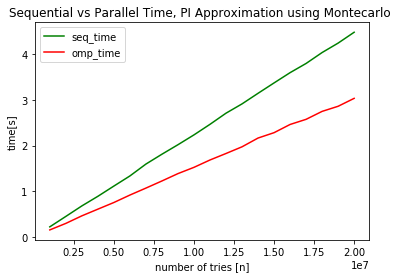

In [9]:
plt.plot(tries,seq_time, 'g',label='seq_time')
plt.plot(tries,omp_time, 'r',label='omp_time')
plt.xlabel('number of tries [n]')
plt.ylabel('time[s]')
plt.legend(loc='upper left')
plt.title("Sequential vs Parallel Time, PI Approximation using Montecarlo ")
plt.show()

## Speedup

[1.4339357895007854, 1.5127148666391317, 1.468982935595635, 1.4612292907635043, 1.4766076450866257, 1.4551497621578298, 1.4910011301123576, 1.4774102033163221, 1.4555038335158816, 1.465979814143216, 1.4629447285065191, 1.4826801461738768, 1.4757341545193934, 1.451998892069061, 1.4768527438650574, 1.460390794051616, 1.4747158296841518, 1.4683586192852052, 1.483222672630696, 1.4767730753515835]


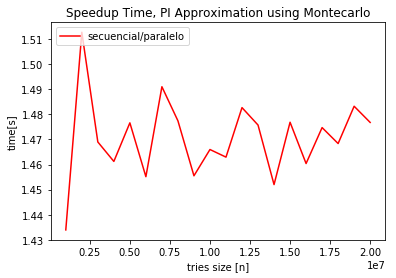

In [14]:
speedup = [ (seq_time[i]/omp_time[i]) for i in range(len(omp_time)) ]
print(speedup)
plt.plot(tries,speedup, 'r-',label='secuencial/paralelo')
plt.xlabel('tries size [n]')
plt.legend(loc='upper left')
plt.ylabel('time[s]')
plt.title("Speedup Time, PI Approximation using Montecarlo")
plt.show()

In [ ]:
# Referencias 